This code performs data exploration and runs a random forest to get the feature weights.
Using the weights a normalized Health Score is created.

In [2]:
#### Initalizing libraries.

import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


### Authorize to mount Google drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Capstone Project./Datasets')


Mounted at /content/drive


In [31]:
### Reading the dataset
df = pd.read_csv('Pivot_Dataset.csv')
df.info()

### Checking for null values
df.isnull().sum()

### Dropping Null values
df1 = df
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47672 entries, 0 to 47671
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           47672 non-null  int64  
 1   datetime             47672 non-null  object 
 2   year                 47672 non-null  int64  
 3   month                47672 non-null  int64  
 4   day                  47672 non-null  int64  
 5   number_of_pushes     47672 non-null  float64
 6   number_of_forks      47672 non-null  float64
 7   number_of_pulls      47672 non-null  float64
 8   number_of_bookmarks  47672 non-null  float64
 9   number_of_issues     47672 non-null  float64
 10  issue_comment_count  47672 non-null  float64
 11  CreateEvent_count    47672 non-null  float64
 12  Total_count          47672 non-null  float64
 13  Status               46213 non-null  float64
 14  repoID               47672 non-null  int64  
dtypes: float64(9), int64(5), object(1)
m

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


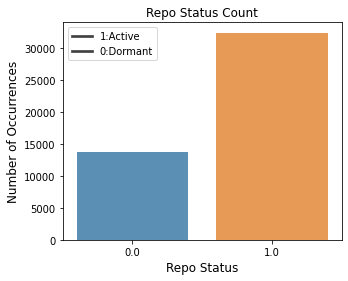

In [18]:
### Distribution of Status Variable

status_count  = df1['Status'].value_counts()
fig = plt.figure(facecolor='white', figsize=(5,4) )
sns.barplot(status_count.index, status_count.values, alpha=0.8)
plt.title('Repo Status Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Repo Status', fontsize=12)
plt.legend(['1:Active','0:Dormant'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


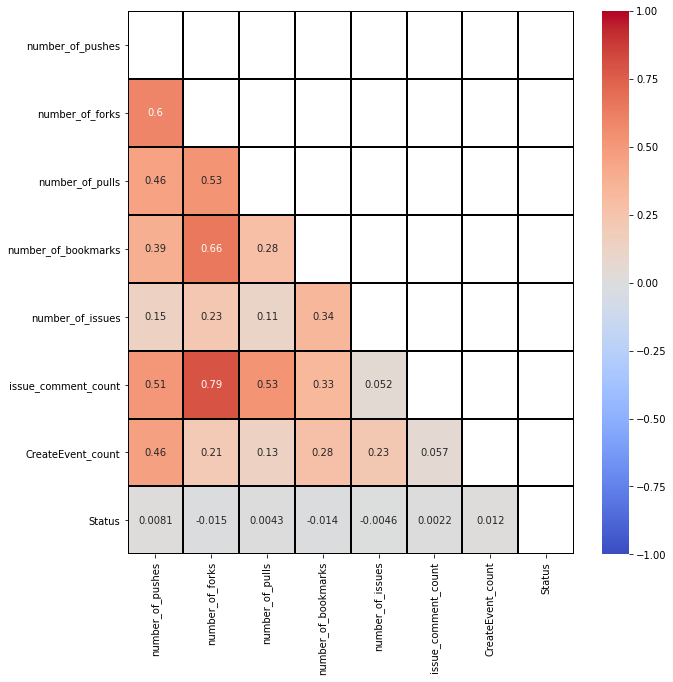

In [32]:
### Dropping unwanted columns
df2 = df1
df2.drop(['Total_count', 'year', 'month', 'day', 'datetime', 'repoID'], axis=1, inplace=True)
df2 = df2.drop(df2.columns[0], axis=1)

###Checking Correlation Matrix
matrix = np.triu(df2.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', mask=matrix)


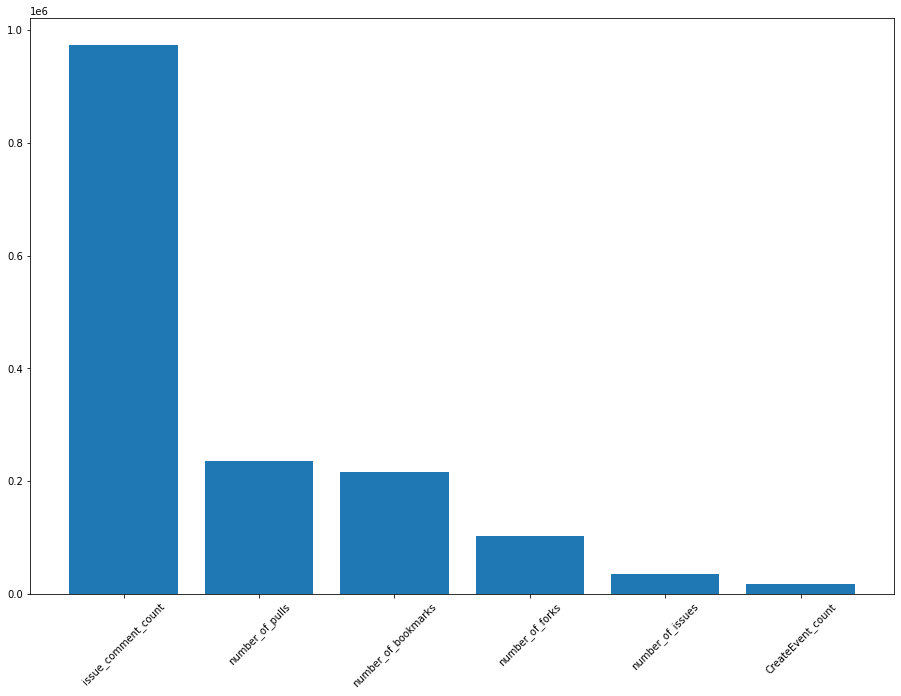

In [36]:
###Checking distribution of Event counts

y = df2['Status']
X = df2.drop('Status', axis =1)
y = pd.DataFrame(y)
#X.info()
X = X.drop(X.columns[0], axis=1)

col_sum=X.sum(axis=0)
col_sum.sort_values(ascending=False, inplace=True)
col_sum
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_axes([0,0,2,2])
ax.bar(col_sum.index,col_sum)
plt.xticks(rotation=45)
plt.show()


In [38]:
!pip install chart_studio

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

!pip install researchpy

import researchpy as rp
import scipy.stats as stats

!pip install bioinfokit

from scipy import stats as st
from bioinfokit.analys import get_data, stat

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46213 entries, 5 to 47670
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_pushes     46213 non-null  float64
 1   number_of_forks      46213 non-null  float64
 2   number_of_pulls      46213 non-null  float64
 3   number_of_bookmarks  46213 non-null  float64
 4   number_of_issues     46213 non-null  float64
 5   issue_comment_count  46213 non-null  float64
 6   CreateEvent_count    46213 non-null  float64
 7   Status               46213 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


In [44]:
df2["Status"] = df2.Status.astype(object)

In [42]:
### Conducting a T-test using scipy on Number od Pushed
a = df2.loc[df2['Status'] == '1', 'number_of_pushes'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'number_of_pushes'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="number_of_pushes", test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff              -0.291627
t                      -1.74061
Std Error               0.167543
df                  46211
P-value (one-tail)      0.0408793
P-value (two-tail)      0.0817587
Lower 95.0%            -0.620014
Upper 95.0%             0.0367599
------------------  -------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0     13810  5.05424    15.5361    0.132204         4.7951         5.31337
      1     32403  5.34586    16.8756    0.0937488        5.16211        5.52961



In [43]:
#### Conducting T-test using scipy on Number of Forks
a = df2.loc[df2['Status'] == '1', 'number_of_forks'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'number_of_forks'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="number_of_forks", test_type=2)
print(res.summary)




Two sample t-test with equal variance

------------------  ---------------
Mean diff               0.289089
t                       3.23788
Std Error               0.0892832
df                  46211
P-value (one-tail)      0.000602523
P-value (two-tail)      0.00120505
Lower 95.0%             0.114092
Upper 95.0%             0.464085
------------------  ---------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0     13810  2.43975    8.70057    0.0740374        2.29463        2.58488
      1     32403  2.15067    8.82175    0.0490075        2.05461        2.24672



In [45]:
#### Conducting T-test using scipy on Number of Pulls
a = df2.loc[df2['Status'] == '1', 'number_of_pulls'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'number_of_pulls'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="number_of_pulls", test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  ------------
Mean diff              -0.294329
t                      -0.934842
Std Error               0.314843
df                  46211
P-value (one-tail)      0.174937
P-value (two-tail)      0.349875
Lower 95.0%            -0.911427
Upper 95.0%             0.322769
------------------  ------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0     13810  4.88791    29.434      0.250468        4.39696        5.37886
      1     32403  5.18224    31.6179     0.175647        4.83796        5.52651



In [46]:
#### Conducting T-test using scipy on Number of Bookmarks
a = df2.loc[df2['Status'] == '1', 'number_of_bookmarks'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'number_of_bookmarks'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="number_of_bookmarks", test_type=2)
print(res.summary)




Two sample t-test with equal variance

------------------  -------------
Mean diff               0.781026
t                       3.07135
Std Error               0.254294
df                  46211
P-value (one-tail)      0.0010661
P-value (two-tail)      0.0021322
Lower 95.0%             0.282605
Upper 95.0%             1.27945
------------------  -------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0     13810  5.23888    20.3042     0.172778        4.90022        5.57755
      1     32403  4.45786    26.7829     0.148787        4.16623        4.74949



In [47]:
#### Conducting T-test using scipy on Number of Issues
a = df2.loc[df2['Status'] == '1', 'number_of_issues'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'number_of_issues'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="number_of_issues", test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff               0.0606897
t                       0.99139
Std Error               0.0612167
df                  46211
P-value (one-tail)      0.16075
P-value (two-tail)      0.3215
Lower 95.0%            -0.0592961
Upper 95.0%             0.180675
------------------  -------------

Parameter estimates

  Level    Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
      0     13810  0.804417    7.52489    0.0640329       0.678904       0.92993
      1     32403  0.743727    5.2555     0.0291959       0.686502       0.800952



In [48]:
#### Conducting T-test using scipy on Issue Comment Count
a = df2.loc[df2['Status'] == '1', 'issue_comment_count'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'issue_comment_count'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="issue_comment_count", test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  ------------
Mean diff              -0.934657
t                      -0.481011
Std Error               1.94311
df                  46211
P-value (one-tail)      0.315255
P-value (two-tail)      0.630511
Lower 95.0%            -4.74318
Upper 95.0%             2.87386
------------------  ------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0     13810  20.3931    179.286      1.52563        17.4027        23.3836
      1     32403  21.3278    196.068      1.08921        19.1929        23.4627



In [49]:
#### Conducting T-test using scipy on Create Event Count
a = df2.loc[df2['Status'] == '1', 'CreateEvent_count'].to_numpy()
b = df2.loc[df2['Status'] == '1', 'CreateEvent_count'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Status", res="CreateEvent_count", test_type=2)
print(res.summary)




Two sample t-test with equal variance

------------------  --------------
Mean diff              -0.0464438
t                      -2.54304
Std Error               0.0182631
df                  46211
P-value (one-tail)      0.00549625
P-value (two-tail)      0.0109925
Lower 95.0%            -0.0822398
Upper 95.0%            -0.0106478
------------------  --------------

Parameter estimates

  Level    Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
      0     13810  0.354815    1.46718    0.0124849       0.330343       0.379287
      1     32403  0.401259    1.92061    0.0106696       0.380346       0.422172



In [50]:
### Normalization using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

X1 = X
Columns = X1.columns
X1 = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=Columns)

In [52]:
### Running a Random Forest model

## Train-test Split
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, shuffle=True)

# Training a basal random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

# prediction and Feature importance
rf_predictions = model.predict(X_test)
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



number_of_bookmarks    0.263886
issue_comment_count    0.205552
number_of_pulls        0.205189
number_of_forks        0.174273
CreateEvent_count      0.078926
number_of_issues       0.072175
dtype: float64

In [ ]:
### Confusion Matrix
import sklearn
sklearn.metrics.confusion_matrix(y_test, rf_predictions, labels=None, sample_weight=None, normalize=None)

array([[ 646, 3446],
       [ 753, 9019]])

In [ ]:
### Checking parameters in use

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 61.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [ ]:
base_model = RandomForestClassifier(n_estimators = 2000, random_state = 42, bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5)
base_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
### Feature importance or best model

rf_predictions = base_model.predict(X_test)
feature_imp = pd.Series(base_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

number_of_bookmarks    0.268020
number_of_pushes       0.167759
issue_comment_count    0.155751
number_of_pulls        0.136240
number_of_forks        0.131161
CreateEvent_count      0.071251
number_of_issues       0.069819
dtype: float64

In [ ]:
sklearn.metrics.confusion_matrix(y_test, rf_predictions, labels=None, sample_weight=None, normalize=None)

array([[  83, 4033],
       [  87, 9661]])

In [ ]:
### Converting weights to list
weights = feature_imp.tolist()

In [ ]:
df3 = df1

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46213 entries, 5 to 47670
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           46213 non-null  int64  
 1   datetime             46213 non-null  object 
 2   year                 46213 non-null  int64  
 3   month                46213 non-null  int64  
 4   day                  46213 non-null  int64  
 5   number_of_pushes     46213 non-null  float64
 6   number_of_forks      46213 non-null  float64
 7   number_of_pulls      46213 non-null  float64
 8   number_of_bookmarks  46213 non-null  float64
 9   number_of_issues     46213 non-null  float64
 10  issue_comment_count  46213 non-null  float64
 11  CreateEvent_count    46213 non-null  float64
 12  Total_count          46213 non-null  float64
 13  Status               46213 non-null  float64
 14  repoID               46213 non-null  int64  
dtypes: float64(9), int64(5), object(1)
m

In [ ]:
weights_dist

{'CreateEvent_count': 0.071251,
 'issue_comment_count': 0.155751,
 'number_of_bookmarks': 0.26802,
 'number_of_forks': 0.131161,
 'number_of_issues': 0.069819,
 'number_of_pulls': 0.13624,
 'number_of_pushes': 0.167759}

In [ ]:
weights = [0.167759, 0.131161, 0.136240, 0.268020, 0.069819, 0.155751, 0.071251] 
weights_array = np.array(weights)

In [ ]:
weights_array.reshape(7,1)

array([[0.167759],
       [0.131161],
       [0.13624 ],
       [0.26802 ],
       [0.069819],
       [0.155751],
       [0.071251]])

In [ ]:
df3 = df1

In [ ]:
def riskscorecalculation(df):
  columns = ['number_of_pushes', 'number_of_forks', 'number_of_pulls', 'number_of_bookmarks', 'number_of_issues', 'issue_comment_count', 'CreateEvent_count']
  weights = [0.167759, 0.131161, 0.136240, 0.268020, 0.069819, 0.155751, 0.071251]
  weights_array = np.array(weights)
  data = np.array(df.iloc[:,5:12])
  df["risk_score"] = np.dot(data, weights_array)

In [ ]:
df4 = riskscorecalculation(df3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3['Normalised_Activity_Score'] = df3.groupby('repoID')['risk_score'].apply(lambda x: (x-x.min())/(x.max()-x.min()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.head()

,Unnamed: 0,datetime,year,month,day,number_of_pushes,number_of_forks,number_of_pulls,number_of_bookmarks,number_of_issues,issue_comment_count,CreateEvent_count,Total_count,Status,repoID,risk_score,Normalised_Activity_Score
5,5,2011-03-20,2011,3,20,87.0,5.0,7.0,31.0,0.0,0.0,1.0,131.0,1.0,108110,24.584389,0.056643
6,6,2011-03-27,2011,3,27,26.0,4.0,1.0,25.0,0.0,0.0,1.0,57.0,0.0,108110,11.794369,0.027175
7,7,2011-04-03,2011,4,3,58.0,1.0,0.0,27.0,0.0,0.0,1.0,87.0,1.0,108110,17.168974,0.039558
8,8,2011-04-10,2011,4,10,86.0,4.0,1.0,25.0,0.0,0.0,1.0,117.0,1.0,108110,21.859909,0.050366
9,9,2011-04-17,2011,4,17,65.0,6.0,1.0,30.0,0.0,0.0,0.0,102.0,1.0,108110,19.868141,0.045777


In [ ]:
df3.to_csv('/content/drive/MyDrive/Capstone_project/Test_Weekly_Activity_Score_RF.csv')

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Capstone_project/Test_Weekly_Activity_Score_RF.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46213 entries, 0 to 46212
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 46213 non-null  int64  
 1   Unnamed: 0.1               46213 non-null  int64  
 2   datetime                   46213 non-null  object 
 3   year                       46213 non-null  int64  
 4   month                      46213 non-null  int64  
 5   day                        46213 non-null  int64  
 6   number_of_pushes           46213 non-null  float64
 7   number_of_forks            46213 non-null  float64
 8   number_of_pulls            46213 non-null  float64
 9   number_of_bookmarks        46213 non-null  float64
 10  number_of_issues           46213 non-null  float64
 11  issue_comment_count        46213 non-null  float64
 12  CreateEvent_count          46213 non-null  float64
 13  Total_count                46213 non-null  flo

In [ ]:
plt.hist(df3.groupby("repoID")["Normalised_Activity_Score"])
plt.show()

(array([262., 110.,  47.,  22.,  11.,   6.,   1.,   4.,   1.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

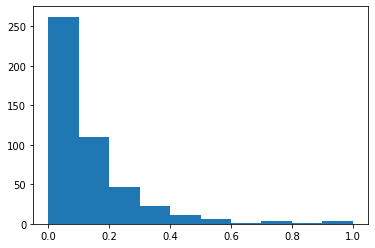

In [ ]:
x1 = df3.loc[df.repoID==309009]
plt.hist(x1["Normalised_Activity_Score"])

In [ ]:
x1.head()

,Unnamed: 0,Unnamed: 0.1,datetime,year,month,day,number_of_pushes,number_of_forks,number_of_pulls,number_of_bookmarks,number_of_issues,issue_comment_count,CreateEvent_count,Total_count,Status,repoID,risk_score,Normalised_Activity_Score


In [ ]:
df3["repoID"].value_counts()

108050       462
309009       462
699689       462
462292       462
206402       462
            ... 
197049571      2
181356720      2
54102331       1
227198066      1
228103273      1
Name: repoID, Length: 279, dtype: int64